In [36]:
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt

# 시각화할 때 한글 출력을 위해서 import
import platform as platform
from matplotlib import font_manager, rc

In [37]:
# 데이터 읽어오기

cctv = pd.read_excel('data/cctv.xlsx')
print(cctv.head())
print(cctv.info())


     기관명    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강 북 구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강 서 구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관 악 구  3985     430.0   56.0  419.0    487    609    619    694    671
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-nu

In [38]:
# pop.txt는 처음 두 개의 행은 의미 없음.
# 한글을 포함
# 구분 기호는 탭
# 천 단위 구분 기호가 존지

pop = pd.read_csv('data/pop.txt', skiprows=2, delimiter='\t', thousands=',')
print(pop.head())
print(pop.info())

         기간  자치구       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9077    4024    5053   1.99     27605  
2    62997    9243    4507    4736   1.96     23980  
3   117430   14287    7910    6377   2.03     38884  
4   148120    6605    2885    3720   2.15     45591  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   자치구   

In [39]:
cctv.rename(columns={cctv.columns[0]:'구 별'}, inplace=True)
pop.rename(columns={pop.columns[1]:'구 별'}, inplace=True)

# cctv의 구 이름에는 중간에 공백이 존재하고 pop은 구 이름에는 공백이 없음

gu = []
for x in cctv['구 별']:
    gu.append(x.replace(' ', ''))
cctv['구 별'] = gu
print(cctv.head())
print(pop.head())

   구 별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강동구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강북구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강서구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관악구  3985     430.0   56.0  419.0    487    609    619    694    671
         기간  구 별       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9

In [40]:
# pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요
pop = pop[['기간','구 별','계','남자','여자']]

# pop 데이터의 첫 번째 행은 전체 데이터의 집계라서 불필요
pop.drop([0],inplace=True)

# 새로운 열을 추가 - 없는 열 이름에 데이터를 대입
pop['여성비율'] = pop['여자'] / pop['계'] * 100
print(pop)

          기간   구 별       계      남자      여자       여성비율
1   2021.2/4   종로구  155106   75009   80097  51.640169
2   2021.2/4    중구  132259   64526   67733  51.212394
3   2021.2/4   용산구  240665  116858  123807  51.443708
4   2021.2/4   성동구  295767  143927  151840  51.337708
5   2021.2/4   광진구  355306  170624  184682  51.978295
6   2021.2/4  동대문구  352259  172865  179394  50.926733
7   2021.2/4   중랑구  394679  194556  200123  50.705257
8   2021.2/4   성북구  443206  212849  230357  51.975154
9   2021.2/4   강북구  306093  148824  157269  51.379483
10  2021.2/4   도봉구  322419  156843  165576  51.354294
11  2021.2/4   노원구  520005  250532  269473  51.821232
12  2021.2/4   은평구  479409  229241  250168  52.182583
13  2021.2/4  서대문구  317699  150608  167091  52.594122
14  2021.2/4   마포구  379984  177998  201986  53.156449
15  2021.2/4   양천구  454288  222538  231750  51.013894
16  2021.2/4   강서구  582995  280822  302173  51.831148
17  2021.2/4   구로구  424582  210936  213646  50.319137
18  2021.2/4   금천구  244685  

In [41]:
df = pd.merge(cctv, pop, on='구 별')
print(df)

     구 별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

In [42]:
# 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 기간 열을 삭제
# del을 이용 - pandas에서는 비추천
del df['2011년 이전']
del df['2012년']
del df['2013년']
del df['2014년']
del df['2015년']
del df['2016년']
del df['2017년']
del df['기간']
print(df)

     구 별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  536107  256449  279658  52.164587
1    강동구  1879    385  469094  230388  238706  50.886603
2    강북구  1265    319  306093  148824  157269  51.379483
3    강서구  1617    254  582995  280822  302173  51.831148
4    관악구  3985    671  502698  251713  250985  49.927591
5    광진구  1581    346  355306  170624  184682  51.978295
6    구로구  3227    486  424582  210936  213646  50.319137
7    금천구  1634    530  244685  124394  120291  49.161575
8    노원구  1906    156  520005  250532  269473  51.821232
9    도봉구   858     71  322419  156843  165576  51.354294
10  동대문구  2003    197  352259  172865  179394  50.926733
11   동작구  1780    255  397231  191657  205574  51.751751
12   마포구  1935    195  379984  177998  201986  53.156449
13  서대문구  2121    194  317699  150608  167091  52.594122
14   서초구  2835    396  422174  202027  220147  52.146035
15   성동구  2679    294  295767  143927  151840  51.337708
16   성북구  3003    643  443206  

In [48]:
df.set_index('구 별', inplace=True)
print(df)

        소계  2018년       계      남자      여자       여성비율
구 별                                                 
강남구   5221    448  536107  256449  279658  52.164587
강동구   1879    385  469094  230388  238706  50.886603
강북구   1265    319  306093  148824  157269  51.379483
강서구   1617    254  582995  280822  302173  51.831148
관악구   3985    671  502698  251713  250985  49.927591
광진구   1581    346  355306  170624  184682  51.978295
구로구   3227    486  424582  210936  213646  50.319137
금천구   1634    530  244685  124394  120291  49.161575
노원구   1906    156  520005  250532  269473  51.821232
도봉구    858     71  322419  156843  165576  51.354294
동대문구  2003    197  352259  172865  179394  50.926733
동작구   1780    255  397231  191657  205574  51.751751
마포구   1935    195  379984  177998  201986  53.156449
서대문구  2121    194  317699  150608  167091  52.594122
서초구   2835    396  422174  202027  220147  52.146035
성동구   2679    294  295767  143927  151840  51.337708
성북구   3003    643  443206  212849  230357  51.

<Axes: ylabel='구 별'>

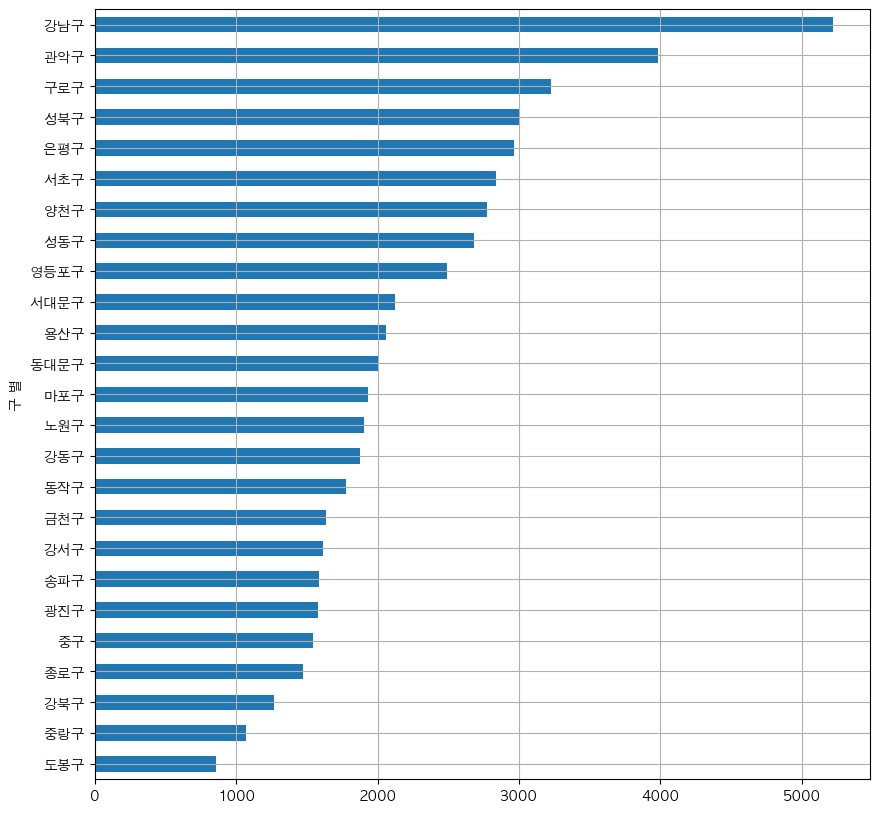

In [49]:
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))

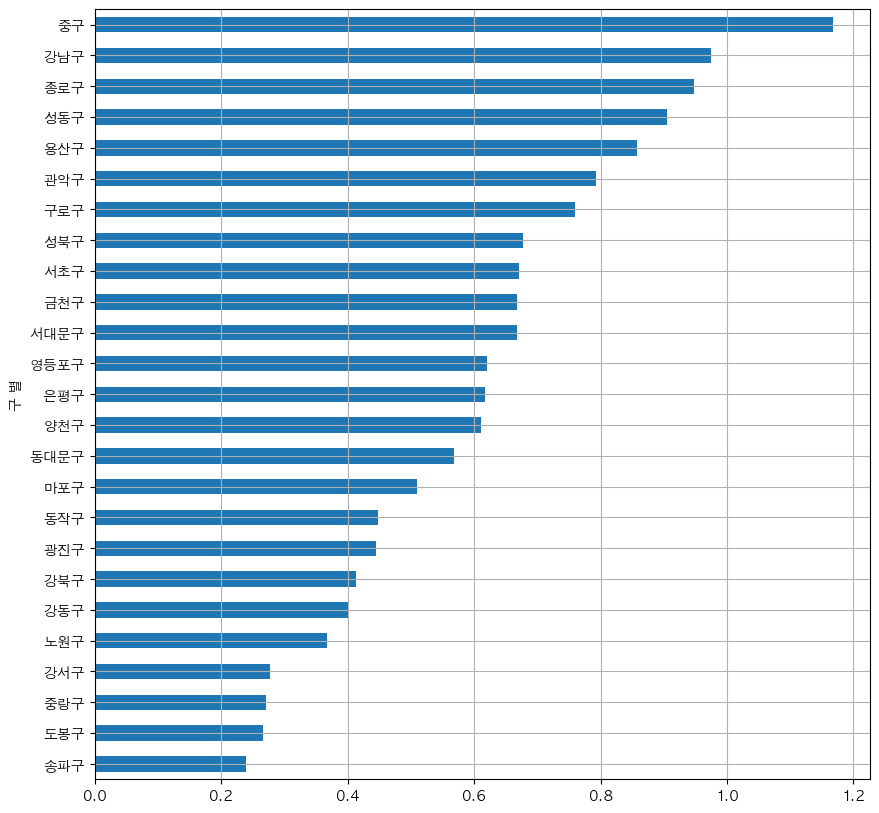

In [50]:
df['cctv비율'] = df['소계'] / df['계'] * 100
df['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

## 인구 수와 CCTV 개수 사이에 연관성이 있는지 확인 - 산점도가 유용

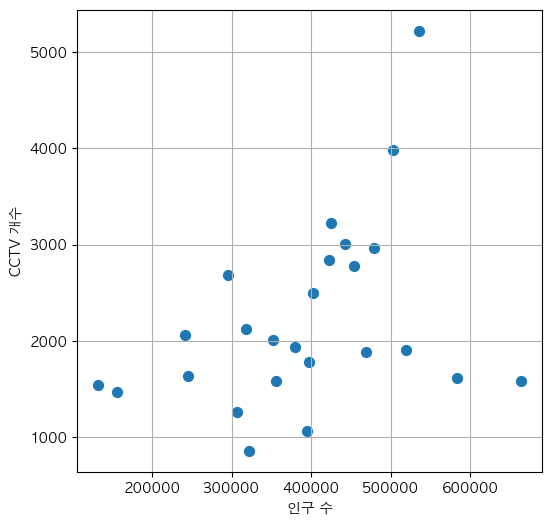

In [51]:
plt.figure(figsize=(6, 6))
plt.scatter(df['계'], df['소계'], s=50)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

# 산점도(산포도)를 그리는 경우에는 방향성과 그룹화 가능성을 확인함.

## 추세선 만들기
2개의 데이터 간의 단항식을 구해서 출력함.

 
0.002892 x + 1087


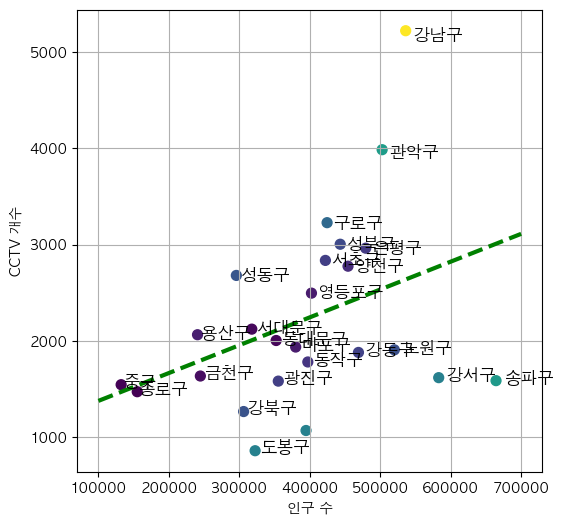

In [57]:
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

fx = np.linspace(100000, 700000, 100)

# 이 값이 -이면 잘못된 값.
df['오차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize=(6, 6))
plt.scatter(df['계'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(24):
    plt.text(df['계'][n] * 1.02, df['소계'][n] * 0.98, df.index[n], fontsize=12)

plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

## Choropleth(단계 구분도)
지도에 색상이나 마커를 이용해서 크기를 표시하는 시각화 방법
카토그램과 다른 점은 영역의 크기를 왜곡하지 않음
### 생성 방법
folium ㅣ아른 패키지를 이용해서 지도를 출력한 후 choropleth 함수를 호출해서 geo_data 옵션에 아이디와 위도 및 경도를 가진 json 파일의 경로를 설정해주고 data에 출력할 DataFrame을 설정
key_on 에 json 파일에서 사용되는 id 컬럼을 지정


In [58]:
# 멀티 인덱스로 사용할 데이터 생성
nul_index = pd.MultiIndex.from_tuples({('cust_1, 'cust_3', + reaaa4-
                                        [p;==============plt(])})

data = [pd.DataFrak = fjl. wjoe;]

SyntaxError: unterminated string literal (detected at line 2) (68378476.py, line 2)